$\newcommand{\calf}{{\cal F}}
\newcommand{\dnu}{d \nu}
\newcommand{\mf}{{\bf F}}
\newcommand{\vu}{{\bf u}}
\newcommand{\vx}{{\bf x}}
\newcommand{\vy}{{\bf y}}
\newcommand{\vs}{{\bf s}}
\newcommand{\ve}{{\bf e}}
\newcommand{\vd}{{\bf d}}
\newcommand{\mg}{{\bf G}}
\newcommand{\ml}{{\bf L}}
\newcommand{\mv}{{\bf V}}
\newcommand{\ma}{{\bf A}}
\newcommand{\mi}{{\bf I}}
\newcommand{\mm}{{\bf M}}
\newcommand{\ball}{{\cal B}}
\newcommand{\ptc}{{\Psi TC}}
\newcommand{\diag}{\mbox{diag}}
\newcommand{\bR}{\mathbb{R}}
\newcommand{\bN}{\mathbb{N}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cH}{\mathcal{H}}
\newcommand{\rmd}{\mathrm{d}}
\newcommand{\bfb}{\mathbf{b}}
\newcommand{\bfc}{\mathbf{c}}
\newcommand{\bfe}{\mathbf{e}}
\newcommand{\bfu}{\mathbf{u}}
\newcommand{\bfv}{\mathbf{v}}
\newcommand{\bfw}{\mathbf{w}}
\newcommand{\bfx}{\mathbf{x}}
\newcommand{\bfy}{\mathbf{y}}
\newcommand{\bfz}{\mathbf{z}}
\newcommand{\bfU}{\mathbf{U}}
\newcommand{\bfA}{\mathbf{A}}
\newcommand{\bfF}{\mathbf{F}}
\newcommand{\bfL}{\mathbf{L}}
\newcommand{\Rn}{\mathbb{R}^{n}}
\newcommand{\Rnn}{\mathbb{R}^{n \times n}}
\newcommand{\zz}{^{\top}}
\newcommand{\uast}{^{\ast}}
\newcommand{\proj}{\mathsf{\Pi}}
\newcommand{\sign}{\mathsf{sign}}
\newcommand{\Diag}{\mathsf{Diag}}
\newcommand{\dkh}[1]{\left(#1\right)}
\newcommand{\hkh}[1]{\left\{#1\right\}}
\newcommand{\fkh}[1]{\left[#1\right]}
\newcommand{\jkh}[1]{\left\langle#1\right\rangle}
\newcommand{\norm}[1]{\left\|#1\right\|}
\newcommand{\abs}[1]{\left\lvert #1\right\rvert}
$

In [25]:
include("notebook_init.jl");

This notebook generates the figures in the paper 
_Complexity of Projected Gradient Methods for Strongly Convex Optimization with H$\ddot{o}$lder Continuous Gradient Terms_

by X. Chen, C. T. Kelley, and L. Wang

# Example 1

This problem is to solve the following two-dimensional PDE,
$$
\cF (u) = - \Delta u + \gamma u_+^{\alpha} = 0,
$$
where $\alpha \in (0,1)$, $\gamma > 0$ is a constant and $u_+ = \max \{u, 0\}$.
Discretizing this problem with the standard five point scheme leads to
$$
\bfF (\bfu) = \bfA \bfu + \gamma \bfu_+^{\alpha} - \bfb = 0
$$ 
 $\bfA \in \Rnn$ is the discretization of $- \Delta$ with zero boundary conditions, $\bfb \in \Rn$ encodes the boundary conditions, and $\bfu_+^{\alpha} = \max \{\bfu, 0\}^{\alpha}$ is understood as a component-wise operation.

We now modify the above problem to enable direct computation of errors in the iterations.
To this end, we take as the exact solution the function
$$
u\uast (x, y) = \dkh{ \frac{3 r - 1}{2} }^{2} \max \hkh{ 0, r - \frac{1}{3} }
$$
where $r = \sqrt{x^2 + y^2}$,
and enforce the boundary conditions
$$
u (x, 1) = u\uast (x,1),\,
        u (x, 0) = u\uast (x, 0),\,
        u(1, y) = u\uast (1, y),\,
        u(0, y) = u\uast (0, y),
$$
for $0 < x,y < 1$. Hence our modified equation is
$$
\bfF (\bfu) - \bfc\uast = 0,
$$
where $\bfc\uast = \bfF (\bfu\uast)$.

The nonlinear system is first order optimality condition for the strongly convex optimization problem.
$$
 \min_{\bfu \in \Rn} \hspace{2mm} f (\bfu) = \dfrac{1}{2} \bfu\zz \bfA \bfu + \dfrac{\gamma}{1 + \alpha} \bfe\zz \bfu_{+}^{1 + \alpha} - (\bfb + \bfc\uast)\zz \bfu,
$$
where $\bfe \in \Rn$ is the vector of all ones.



## Figures for Example 1

Generate Figures 1(a), 1(b), 2(a), and 2(b). Theses figures are for Algorithm 1. Figures 1(a) and 2(a) compare various
stepsizes $\tau = \tau_0 h^2$ which are consistent with the CFL condition. Figures 1(b) and 2(b) examine values of the exponent $p$.

The files for building the figures are in __/src/Figures__. The code is __Figures_Alg1.jl__ and the functions __Figure1_2a__ and __Figure1_2b__. The functions take the dimension as an argument.

Figure 1a

Alg1: testing $\tau_0$. n=15,$\alpha$ =5.00000e-01


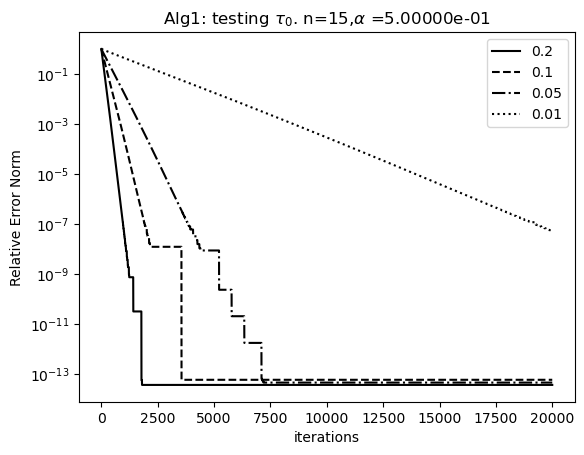

In [26]:
Figure1a(15; alpha=.5);

Now we compare the effects of changing the exponent $\alpha$. Here we can see the effects of the change I made in Alg 1 by letting the gradient norm increase without terminating the iteration. __In this figure, and in several others, the thick lines are artifacts of small rapid oscillations in the error norm which reflect stagnation in the iteration.__

Figure 1b

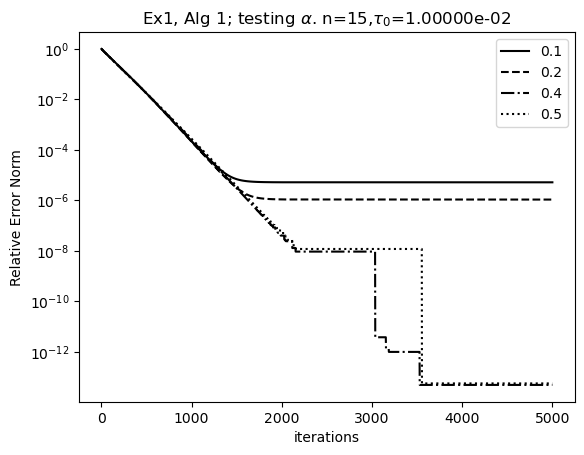

In [27]:
Figure1b(15; maxit=5000);

And finally repeat the computation for a 31x31 grid. This will complete the computations for Example 1 + Algorithm 1.

__If we are no longer considering the line search, we should remove the discussion of Alg 2.__ The next example is Figure 2, which tests Algorithm 2. We start with $\tau_0 = 1$ and let the line search work.

Figure 2

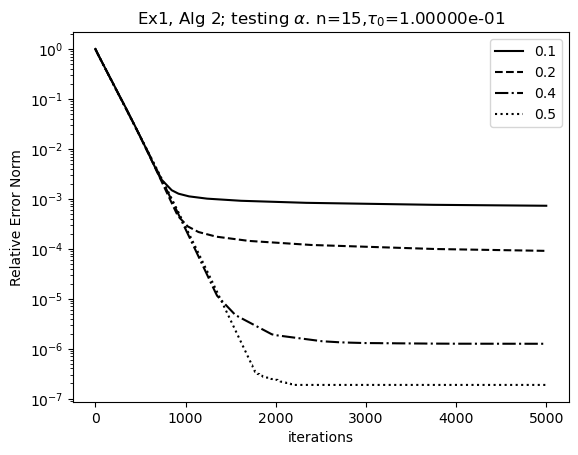

In [28]:
Figure2(15; maxit=5000);

The advantage of the line search is that one does not have to manually
adjust $\tau_0$.

The results for Algoirthm 3 are in Figures 4 and 5. We set $\nu = \tau_0 h^2$ in these examples and will need to modify that to use the estimate in Remark 4.2. In the first two figures 3(a) and 3(b) use use the values of $\tau_0$ we used in Figure 1.

Figure 3a

Ex1, Alg3: testing $\tau_0$. n=15,$\alpha$ =5.00000e-01


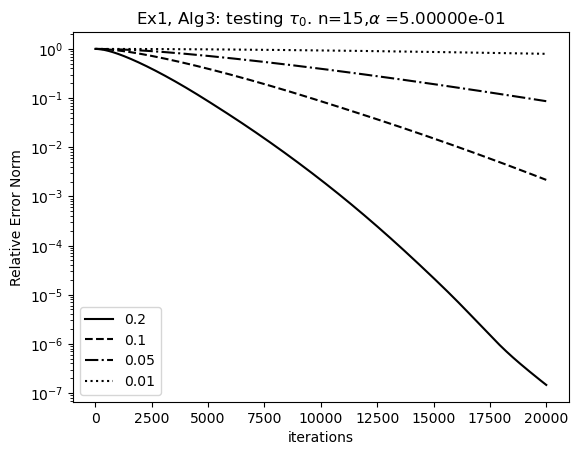

In [29]:
Figure3_4a(15);

Figure 3b

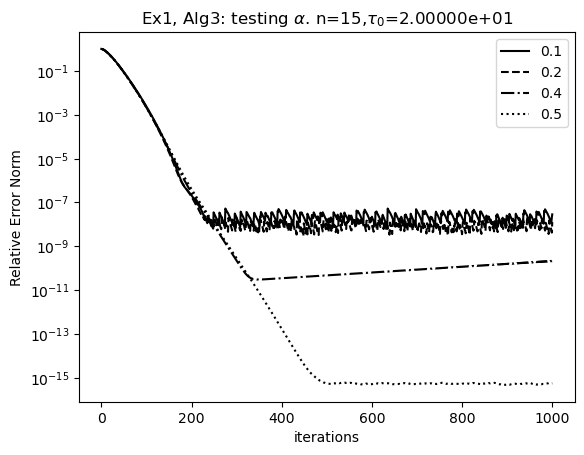

In [30]:
Figure3_4b(15; maxit=1000);

Now we use the larger values of $\tau_0$.

Figure 4a

Ex1, Alg3: testing $\tau_0$. n=15,$\alpha$ =5.00000e-01


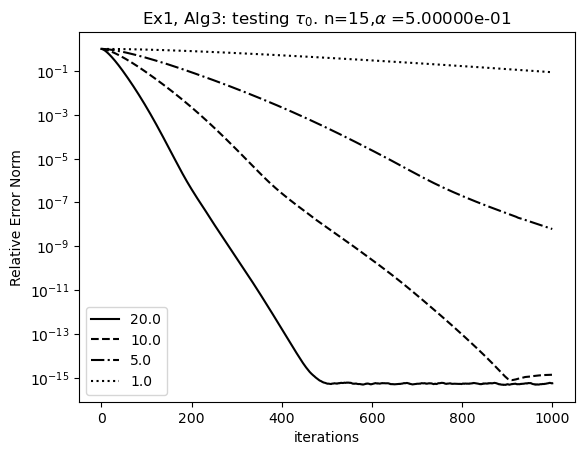

In [31]:
Figure3_4a(15; maxit=1000, tauvec=[20.0, 10.0, 5.0, 1.0]);

Figure 4b

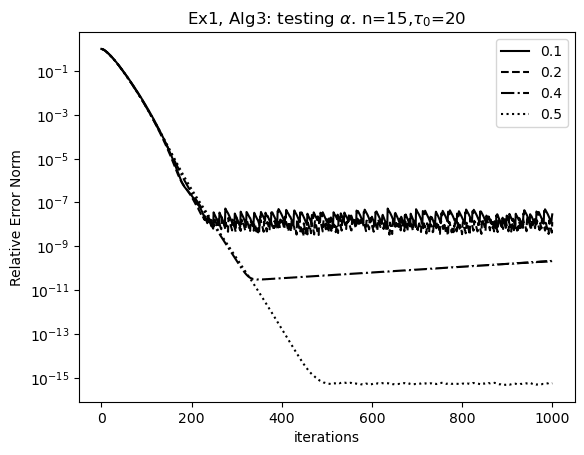

In [32]:
Figure3_4b(15; maxit=1000, tau0=20);

# Example 2

This example is a constrained semi-linear elliptic boundary value problem. Define for sufficienlty smooth $u$
$$
\cH (u) = - \Delta u + \delta |u|^{\alpha} \sign (u) - |u|^{p - 1} u
$$
on $D = (0, 1)^2$ with the boundary condition $u (x, y) = 0.5 - \sin(x) \sin(y)$ on $\partial D$.
Here, $\alpha \in (0, 1)$, $p > 1$, and $\delta > p / \alpha$ are three constants.
We consider the variational inequality that is to find $u\uast$ with $u\ast(x,y) \in [-1,1]$ such that
$$
\cH (u\uast) (u - u\uast) \geq 0
$$
for any $u$ with values in $[-1,1]$. 

This problem is equivalent to the following nonlinear equation,
$$
    0 = \cF (u) :=
    \left\{
    \begin{aligned}
        & \cH (u),
        && \mbox{if~} u - \cH (u) \in [-1, 1], \\
        & u - 1,
        && \mbox{if~} u - \cH(u) \geq 1, \\
        & u + 1,
        && \mbox{otherwise}.
    \end{aligned}
    \right.
$$
After discretization we have the nonlinear system
$$
 0 = \bfF (\bfu) :=  \dkh{ \bfu - \proj_{\bfU} \dkh{ \bfu - \tau \dkh{ \bfA \bfu + \delta \abs{\bfu}^{\alpha} \sign (\bfu) - \abs{\bfu}^{p - 1} \bfu - \bfb } } }
$$
where $\bfU = [-1, 1]^n$,  $\tau > 0$ is the stepsize, $\bfA \in \Rnn$ is a symmetric positive definite matrix, and $\bfb \in \Rn$ encodes the boundary conditions. The boundary conditions insure that the solution
will change signs in the domain so the non-Lipschitz features are exercised. Hence the iteration for Algorithm 1 would look like
$$
\bfu_{k+1} = \proj_{\bfU} \dkh{ \bfu - \tau \dkh{ \bfA \bfu_k + \delta \abs{\bfu_k}^{\alpha} \sign (\bfu_k) - \abs{\bfu_k}^{p - 1} \bfu_k - \bfb } }
$$
In the example we use $\tau = \tau_0 h^{-2}$ as we did in Example 1.

The nonlinear equation is the necessary condition for the optimization problem 
$$
\min_{\bfu \in \Omega} f(\bfu) := \frac{1}{2} \dkh{ f_1(\bfu) + f_2(\bfu) }
$$
where
$$
        f_1 (\bfu) = \bfu\zz \bfA \bfu - 2 \bfb\zz \bfu - \frac{2}{1 + p} \bfe\zz \abs{\bfu}^{1 + p}, 
        \mbox{~and~}
        f_2 (\bfu) = \frac{2 \delta}{1 + \alpha} \bfe\zz \abs{\bfu}^{1 + \alpha}.   
$$
Our conditions on the problem struture hold with
$\alpha_1 = 1$, $L_1 = 2 \norm{\bfA} + 2 p$, $\alpha_2 = \alpha$, and $L_2 = 2 \delta \alpha$. The condition that
$\alpha \in (0, 1)$, $p > 1$, and $\delta > p / \alpha$ implies strong convexity.

## Figures for Example 2

In all the examples we use $\delta = 20$ and $p=1.5$. The parameter $\alpha$ ranges from $.1$ to $.8$, so $\delta > \alpha/p$ in
all cases. 


Figure5a

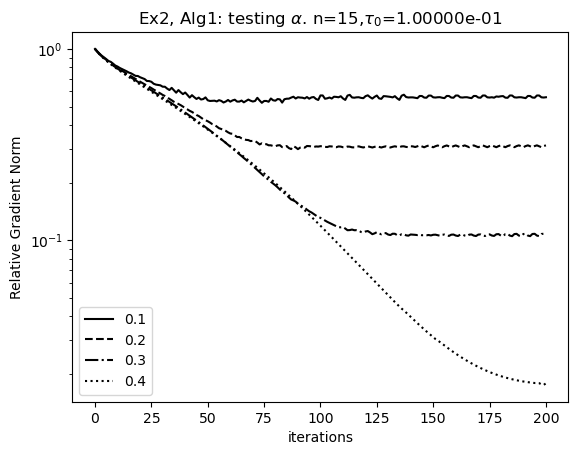

Python: Text(0.5, 1.0, 'Ex2, Alg1: testing $\\alpha$. n=15,$\\tau_0$=1.00000e-01')

In [33]:
Figure5ac(15; tau0=.1, maxit=200, pvec=[.1, .2, .3, .4])

Figure5b.

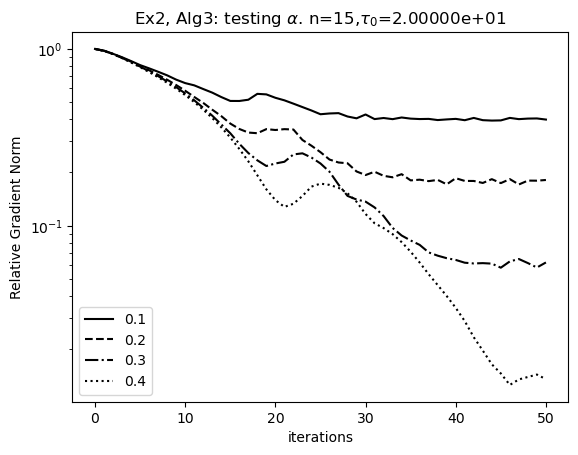

In [34]:
Figure5bd(15; tau0=20.0, pvec=[.1, .2, .3, .4], maxit=50);

Figure 5c.

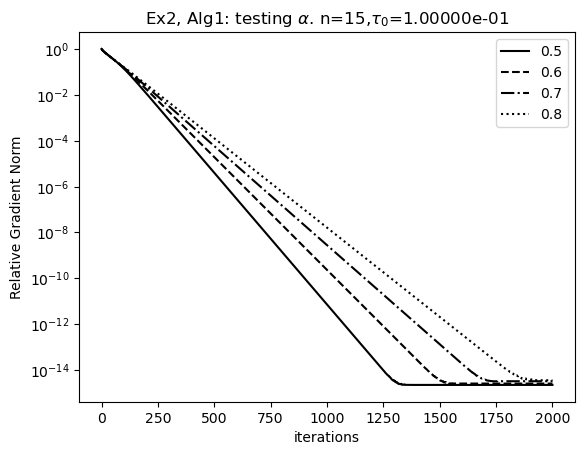

In [35]:
Figure5ac(15; tau0=.1, pvec=[.5, .6, .7, .8], maxit=2000);

Figure 5d.

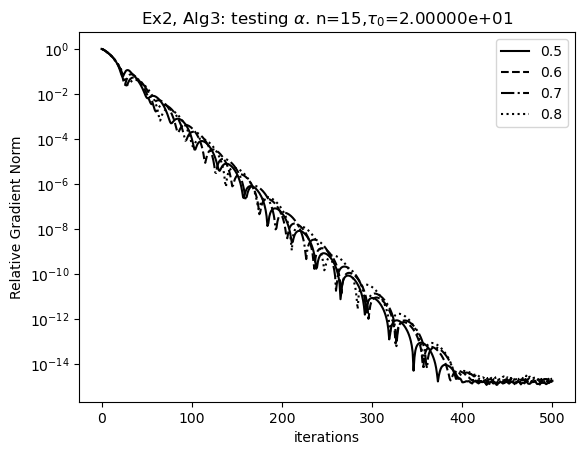

In [36]:
Figure5bd(15; tau0=20.0, pvec=[.5, .6, .7, .8], maxit=500);